A Telco company has observed that their clients are leaving them depending on the amount of 
dropped calls. As analysts we are tasked with the work of finding which customers have more 
probability of churning.
To perform this task, we are handed:
1. Dataset containing transactional data on calls ‘CALL_INFO.txt’
2. Dataset containing information regarding our customers ‘CUSTOMERS.txt’
3. Dataset containing the codes for call end ‘CALL_DROP_CODE.csv’


In [1]:
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

1) Explore the data at hand.
2) Establish Hypothesis – People cancel subscription because their calls drop abruptly let’s find which customers may churn.
3) Create a Folder and add the the 3 Datasets:
• CALL_INFO
• CUSTOMERS
• CALL_DROP_CODE
4) Discover the data – Read CALL_INFO dataset.
HINT: df_calls = pd.read_csv('CALL_INFO.txt',sep='\t')
5) Structure the data - Split MSISDN, IMSI, IMEI, Disconnect Reason, Call Type and drop original columns.
HINT: df = df.drop(columns=[‘a’,’b’,’c’])
6) Fix errors on IMSI and IMEI replacing strange characters with an empty space.
7) Drop rows that are not calls. (remember MMS and SMS? J):
HINT: df = df.drop(df[(Boolean condition 1) | (Boolean condition 2)].index)
8) Change data type of the column DISCONNECT REASON and IMSI to be able to merge: 
HINT: df[‘column’]= df[‘column’].astype(int64)

In [131]:
df_codes = pd.read_csv('CALL_DROP_CODE.csv')

In [147]:
df_call_info_raw = pd.read_csv('CALL_INFO.txt', delimiter = '\t')

In [148]:
df_call_info = df_call_info_raw.rename(columns = {
    r"I<IMSI/MSIDN/IMEI>":"IMSI/MSIDN/IMEI",
    r'DATETTIME/TIMEZONE OFFSET/DURATION': r'DATETIME, TIMEZONE, DURATION',
    r'MSWICENT:BASCENTCONT:BASTRASTA': r'MSWICENT:BASCENTCONT:BASTRASTA',
    r'CALL_TYPE/CORRESP_IDN/DISCONNECT REASON': r'CALL_TYPE/CORRESP_IDN/DISCONNECT REASON'})

In [149]:
df_call_info['DATETIME'] = df_call_info['DATETIME, TIMEZONE, DURATION'].str.split('/', expand = True)[0]
df_call_info['TIMEZONE'] = df_call_info['DATETIME, TIMEZONE, DURATION'].str.split('/', expand = True)[1]
df_call_info['DURATION'] = df_call_info['DATETIME, TIMEZONE, DURATION'].str.split('/', expand = True)[2]

In [150]:
df_call_info['IMSI'] = df_call_info['IMSI/MSIDN/IMEI'].str.split('/', expand = True)[0]
df_call_info['MSIDN'] = df_call_info['IMSI/MSIDN/IMEI'].str.split('/', expand = True)[1]
df_call_info['IMEI'] = df_call_info['IMSI/MSIDN/IMEI'].str.split('/', expand = True)[2]

In [151]:
df_call_info['MSWICENT'] = df_call_info['MSWICENT:BASCENTCONT:BASTRASTA'].str.split(':', expand = True)[0]
df_call_info['BASCENTCONT'] = df_call_info['MSWICENT:BASCENTCONT:BASTRASTA'].str.split(':', expand = True)[1]
df_call_info['BASTRASTA'] = df_call_info['MSWICENT:BASCENTCONT:BASTRASTA'].str.split(':', expand = True)[2]

In [152]:
df_call_info['CALL_TYPE'] = df_call_info['CALL_TYPE/CORRESP_IDN/DISCONNECT REASON'].str.split('/', expand = True)[0]
df_call_info['CORRESP_IDN'] = df_call_info['CALL_TYPE/CORRESP_IDN/DISCONNECT REASON'].str.split('/', expand = True)[1]
df_call_info['DISCONNECT REASON'] = df_call_info['CALL_TYPE/CORRESP_IDN/DISCONNECT REASON'].str.split('/', expand = True)[2]

In [153]:
df_call_info = df_call_info[['IMEI', 'MSIDN', 'IMSI', 'DATETIME', 'TIMEZONE',
       'DURATION', 'MSWICENT', 'BASCENTCONT', 'BASTRASTA', 'CALL_TYPE',
       'CORRESP_IDN', 'DISCONNECT REASON']]

In [155]:
df_call_info['IMEI'] = [re.sub("[^0-9]", "", x) for x in df_call_info['IMEI']]
df_call_info['IMEI'] = df_call_info['IMEI'].astype('int64')
df_call_info['MSIDN'] = [re.sub("[^0-9]", "", x) for x in df_call_info['MSIDN']]
df_call_info['MSIDN'] = df_call_info['MSIDN'].astype('int64')
df_call_info['IMSI'] = [re.sub("[^0-9]", "", x) for x in df_call_info['IMSI']]
df_call_info['IMSI'] = df_call_info['IMSI'].astype('int64')

In [186]:
df_call_info['DISCONNECT REASON'] = [str(x.replace(' ', '')) for x in df_call_info['DISCONNECT REASON']]

In [188]:
df_call_info['DISCONNECT REASON'] = [x.replace('', '0') for x in df_call_info['DISCONNECT REASON']]

In [191]:
[x.replace('', '11') for x in df_call_info['DISCONNECT REASON']]

['11',
 '0',
 '0',
 '0',
 '11',
 '11',
 '0',
 '0',
 '11',
 '11',
 '0',
 '11',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 '0',
 '11',
 '11',
 '0',
 '0',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 '11',
 '0',
 '11',
 '11',
 '0',
 '0',
 '0',
 '0',
 '11',
 '11',
 '0',
 '0',
 '0',
 '0',
 '11',
 '0',
 '0',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 '0',
 '11',
 '0',
 '0',
 '0',
 '11',
 '0',
 '0',
 '11',
 '0',
 '0',
 '0',
 '0',
 '11',
 '0',
 '0',
 '0',
 '11',
 '0',
 '0',
 '0',
 '11',
 '0',
 '0',
 '11',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '11',
 '11',
 '0',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '0',
 '11',
 '11',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '11',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 '0',
 '01090',
 '11',
 '11',
 '11',
 '11',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 '11',
 '0',
 '0',
 '11',
 '11',
 '11',
 '0',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 '0',
 '0',
 '0',
 '11',
 '11',
 '0',
 '11',
 '11',
 '0',
 '0',
 '11',
 '01090',
 '11',
 '0',
 '11',
 '0',
 '0',
 '11',
 '0',
 '11',
 '0',
 

In [172]:
[x.replace('', '') for x in df_call_info['DISCONNECT REASON'] if len(x) == 0 x]

SyntaxError: invalid syntax (4112827772.py, line 1)

In [184]:
df_call_info['DISCONNECT REASON'].astype('float64')

ValueError: could not convert string to float: ''

In [183]:
df_call_info['DISCONNECT REASON'].fillna("ASDA")

0         11
1           
2           
3           
4         11
          ..
348621    11
348622    11
348623    11
348624      
348625      
Name: DISCONNECT REASON, Length: 348626, dtype: object

In [142]:
df_call_info['DISCONNECT REASON'] = [x.replace('', '0') for x in df_call_info['DISCONNECT REASON']]
df_call_info['DISCONNECT REASON'] = df_call_info['DISCONNECT REASON'].astype('float64')

In [173]:
df_call_info

,IMEI,MSIDN,IMSI,DATETIME,TIMEZONE,DURATION,MSWICENT,BASCENTCONT,BASTRASTA,CALL_TYPE,CORRESP_IDN,DISCONNECT REASON
0,11808005351311,13011330554,310170097665881,2014-12-12T00:06:13,-5,1.55,MSC001,BSC002,BTS00783,MOT,00000000000,11
1,11808005351311,13011330554,310170097665881,2014-12-12T02:27:26,-5,0.00,MSC001,BSC002,BTS00783,SMS,00000000000,
2,11808005351311,13011330554,310170097665881,2014-12-12T03:24:20,-5,0,MSC001,BSC001,BTS00783,SMS,00000000000,
3,11808005351311,13011330554,310170097665881,2014-12-12T03:52:43,-5,0,MSC001,BSC001,BTS00783,MMS,00000000000,
4,11808005351311,13011330554,310170097665881,2014-12-12T05:24:34,-5,212,MSC001,BSC001,BTS00782,MOT,00000000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...
348621,11808001152866,14103682306,310120226986054,2014-12-12T03:39:07,-5,4.78,MSC001,BSC002,BTS00780,MOC,00000000000,11
348622,11808001152866,14103682306,310120226986054,2014-12-12T06:09:56,-5,47,MSC001,BSC001,BTS00780,MOT,00000000000,11
348623,11808001152866,14103682306,310120226986054,2014-12-12T08:27:15,-5,115,MSC001,BSC001,BTS00779,MOC,00000000000,11
348624,11808001152866,14103682306,310120226986054,2014-12-12T09:10:45,-5,0.00,MSC001,BSC002,BTS00779,MMS,00000000000,


## DROP ROWS THAT ARE NOT CALLS

In [109]:
df_call_info = df_call_info[(df_call_info['CALL_TYPE'] != 'SMS') & (df_call_info['CALL_TYPE'] != 'MMS')]

In [110]:
df_call_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123517 entries, 0 to 348623
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   IMEI               123517 non-null  int64 
 1   MSIDN              123517 non-null  int64 
 2   IMSI               123517 non-null  int64 
 3   DATETIME           123517 non-null  object
 4   TIMEZONE           123517 non-null  object
 5   DURATION           123517 non-null  object
 6   MSWICENT           123517 non-null  object
 7   BASCENTCONT        123517 non-null  object
 8   BASTRASTA          123517 non-null  object
 9   CALL_TYPE          123517 non-null  object
 10  CORRESP_IDN        123517 non-null  object
 11  DISCONNECT REASON  123517 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 12.3+ MB


9) Discover the data – Read CALL_DROP_CODE dataset.
HINT: df_drop_code = pd.read_csv('CALL_DROP_CODE.csv',names=['ID', ‘REASON'])
10) Enrich the data – Merge the CALL_INFO table to the Drop Code Reason table.
11) Keep rows with CALL DROPED.
12) Find subscribers - Groupby to find the subscribers (IMSI) who have risk of cancelling their subscription due to “dropped calls”.
13) Discover the data – Read CUSTOMERS dataset
HINT: df_customers = pd.read_csv('CUSTOMERS.txt’)
14) Keep only the subscribers that are ACTIVE since our transactional data (CALL_INFO) won’t have data for inactive customers.
15) Find the subscribers– Merge CUSTOMERS dataset with CALL_INFO dataset selecting the columns you want to keep.
16) Sort rows in descending order to fins which clients have more DROPPED CALLS.
HINT: df.sort_values(‘column',ascending=False)
17) Optional: Explore the results, can you extract any conclusion? Maybe grouping by city

In [111]:
df_call_drop = pd.read_csv('CALL_DROP_CODE.csv',names=['ID', 'REASON'])

In [116]:
df_call_drop

,ID,REASON
0,11,CALL ENDED
1,19,CALL DROPPED


In [129]:
df_call_info.merge(df_call_drop, left_on = 'DISCONNECT REASON', right_on = 'ID', how = 'left')

ValueError: You are trying to merge on object and int64 columns for key 'DISCONNECT REASON'. If you wish to proceed you should use pd.concat

In [90]:
df_call_info.describe()

,IMEI,MSIDN,IMSI,DISCONNECT REASON
count,1.235170e+05,1.235170e+05,1.235170e+05,1.235170e+05
mean,2.525204e+14,1.600967e+10,3.100873e+14,3.100873e+14
std,1.576685e+14,2.364431e+09,8.555652e+10,8.555652e+10
min,1.124500e+13,1.201102e+10,3.100040e+14,3.100040e+14
25%,1.300600e+13,1.407570e+10,3.100068e+14,3.100068e+14
50%,3.535780e+14,1.619105e+10,3.100305e+14,3.100305e+14
75%,3.582401e+14,1.813744e+10,3.101603e+14,3.101603e+14
max,3.597950e+14,1.989875e+10,3.102610e+14,3.102610e+14


In [66]:
df_call_info['IMEI'].apply(str.replace('>', ''))

TypeError: replace expected at least 2 arguments, got 1

In [61]:
# MSWICENT SOLO TIENE UN VALOR.
df_call_info = df_call_info.drop('MSWICENT', axis = 1)

asd
0
1
2
3
4
asd
asd
asd


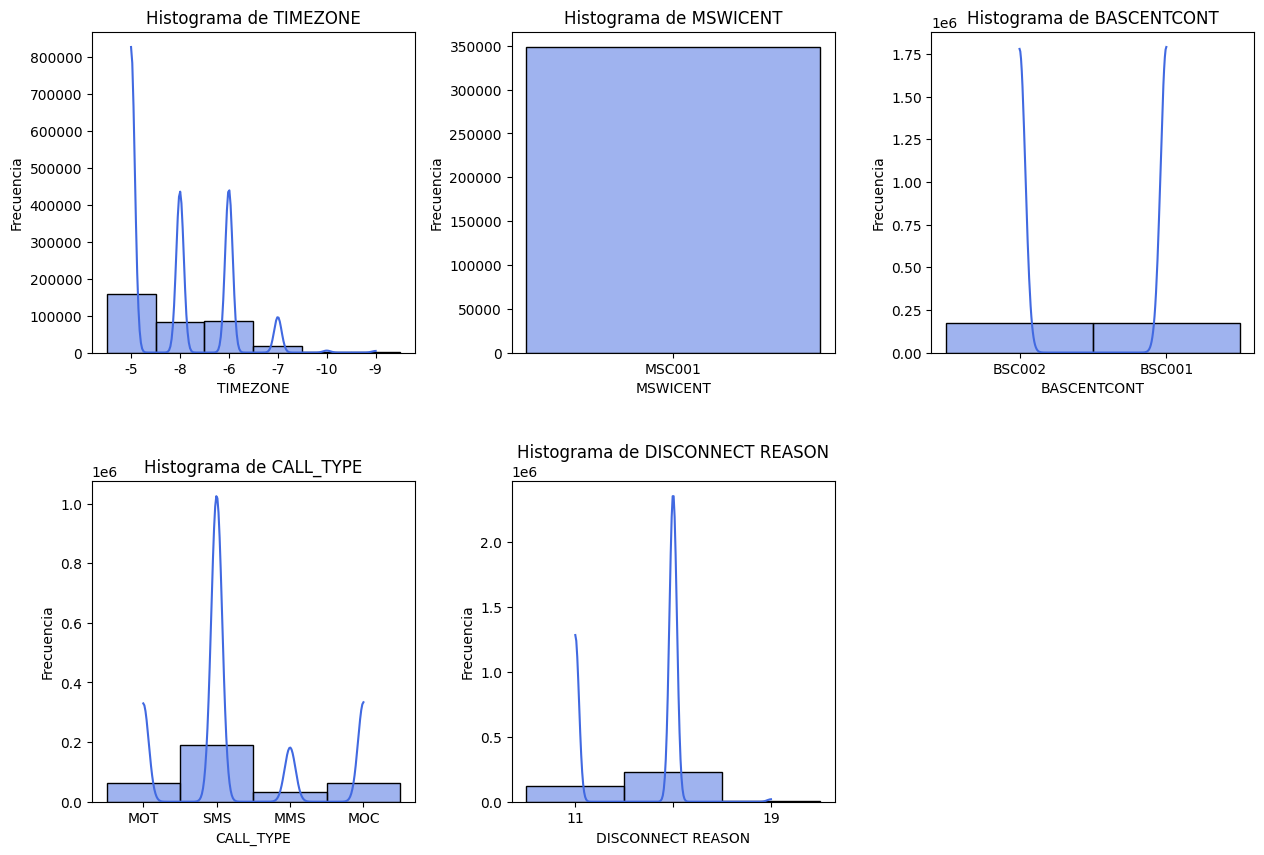

In [27]:
dimensiones = ['TIMEZONE', 'MSWICENT', 'BASCENTCONT', 'CALL_TYPE', 'DISCONNECT REASON']

# Determinar la cantidad de filas y columnas para la matriz de gráficos
num_dim = len(dimensiones)
num_cols = 3  # Número de columnas en la matriz de gráficos
num_rows = (num_dim // num_cols) + (num_dim % num_cols > 0)  # Ajustar filas

# Determinar la cantidad de filas y columnas para la matriz de gráficos
num_dim = len(dimensiones)
num_cols = 3  # Número de columnas en la matriz de gráficos
num_rows = (num_dim // num_cols) + (num_dim % num_cols > 0)  # Ajustar filas

# Crear la figura y ejes con Seaborn y Matplotlib
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que `axes` sea iterable en caso de una sola fila
axes = axes.flatten()
print("asd")
# Generar histogramas con Seaborn
for i, dim in enumerate(dimensiones):
    print(i)
    sns.histplot(df_call_info[dim], bins=30, kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f"Histograma de {dim}")
    axes[i].set_xlabel(dim)
    axes[i].set_ylabel("Frecuencia")
print("asd")
# Ocultar los ejes vacíos si hay más subplots de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
print("asd")
# Ajustar el diseño sin que se bloquee
plt.subplots_adjust(hspace=0.4, wspace=0.3)
print("asd")
# Mostrar los gráficos
plt.show()

## 6.- Fix errors on IMSI and IMEI replacing strange characters with an empty space.